Import the modules needed

In [1]:
import torchvision.transforms as transforms
import cv2
import torch
import matplotlib.pyplot as plt

Arrange the device type to load the data and model in, put cuda if a gpu exists, otherwise cpu

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Code will run on", device)

Code will run on cpu


Read one example image using OpenCV library and visualize it with matplotlib library<br><br>
<b> Quick Tip </b> <br>
OpenCV is a library uses BGR format to read, write and show images Wwhile matlotlib uses RGB format. 
To be able to see our image read by OpenCV without any color change, we have to arrange the color channels
so instead of using plt.imshow(img) command, we arrange the channel order before sending it to matlotlib function by <b> img[:,:,[2,1,0] </b>

(263, 320, 3)


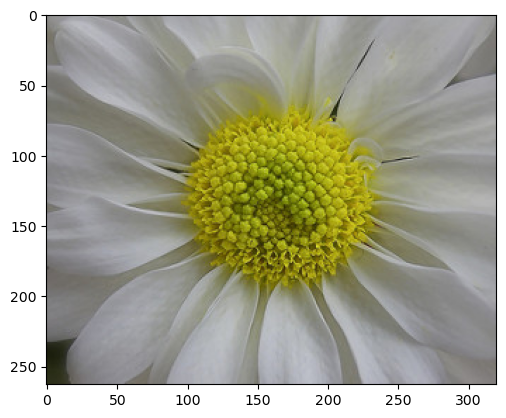

In [3]:
img = cv2.imread("data_flowers/daisy/100080576_f52e8ee070_n.jpg") #BGR
print(img.shape) # h,w,c
plt.imshow(img[:,:,[2,1,0]]) #RGB

<b> Quick Tip </b> <br>
OpenCV reads images as numpy arrays, while torch convolutional layers expect a torch Tensor as input data. So we have to transform our numpy array image matrix to torch tensor as below. This transform helps us with a second thing: OpenCV reads images with height, width, channel order while torch convolutional layer expects channel, height, width order from its input. Fortunately, torch transform makes this change of dimension order so we don't have to deal with it explicitly

In [4]:
to_tensor = transforms.ToTensor()
img = to_tensor(img)

print(img.shape)

torch.Size([3, 263, 320])


<b> Quick Tip </b> <br>
Last step before sending our image to the convolutional layer! torch convolutional layers expect 
a 4-dimensional data whereas our image is 3 dimensional (channel, height, width). The expected 4. dimension is
for batch size. As its mentioned before, we may want to sent the data to the model by batches not 1 by 1. So eventhough we will send only 1 image now, we have to add the 4. dimension to our image and convert it to a 4D Tensor

In [5]:
img = img.unsqueeze(0)

print(img.shape)


torch.Size([1, 3, 263, 320])


<b> Quick Tip </b> <br>
Time to create a convolutional layer using torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, ..) function! Below a convolutional layer created which expects an input with 3 channels and which applies convolution with 5x5 kernels and create 12 feature maps as output. <u> In other words, we have 12 filters, 1 filter has 3 kernel inside with the size of 5x5. </u>

padding="same" argument tells the function to apply padding large enough to ensure that the output data size does not change. The padding type is "zero-padding" by default in Pytorch, so if a padding is applied the values of newly coming borders are all 0.

Before using the layer, we can even check the weights initialized randomly. Also the shape info clarifies that each filter has one bias individually (not each kernel!)

In [6]:
layer = torch.nn.Conv2d(3, 12, 5, stride=1, padding="same") # expect batch,c,h,w

weights = layer.weight
biases = layer.bias

print(weights.shape)
print(weights)

print(biases.shape)
print(biases)

torch.Size([12, 3, 5, 5])
Parameter containing:
tensor([[[[-0.0301, -0.0259,  0.0410, -0.0903,  0.0212],
          [ 0.0938, -0.0599, -0.0593,  0.0481,  0.0490],
          [ 0.0237, -0.0027, -0.1075, -0.0764,  0.0802],
          [ 0.0849,  0.0555,  0.0625,  0.0979,  0.0810],
          [ 0.1092, -0.0242, -0.0924,  0.0895, -0.0759]],

         [[-0.0125,  0.0505,  0.0521,  0.0905,  0.0317],
          [ 0.0961, -0.0356,  0.0248, -0.0357,  0.0862],
          [-0.0173,  0.0457,  0.0677, -0.0367,  0.0732],
          [ 0.0734, -0.0371,  0.0874, -0.0115, -0.1124],
          [ 0.0340, -0.0549,  0.0355, -0.0234, -0.0794]],

         [[ 0.0622, -0.0783,  0.0033,  0.0180,  0.0083],
          [ 0.1065,  0.0489, -0.0946, -0.0097, -0.0996],
          [ 0.0370, -0.0108, -0.0636,  0.1143,  0.0849],
          [ 0.0814,  0.0074, -0.0738,  0.0135, -0.0744],
          [ 0.0071, -0.0088,  0.1024,  0.0326,  0.1072]]],


        [[[-0.1087,  0.0162, -0.0235,  0.0578, -0.0265],
          [ 0.0572,  0.0270, -0.

Finally its time to use our CNN layer to our input image. After obtaining the output, it is visualized 12 feature map in one plot using matplotlib<br><br>
<b> Quick Tip </b> <br>
While torch convolutional layer give as a torch Tensor as output, matplotlib expects a numpy type input data. So 
retransform the Tensor to numpy array with <b> filter.detach().cpu().numpy() </b> part

torch.Size([1, 12, 263, 320])


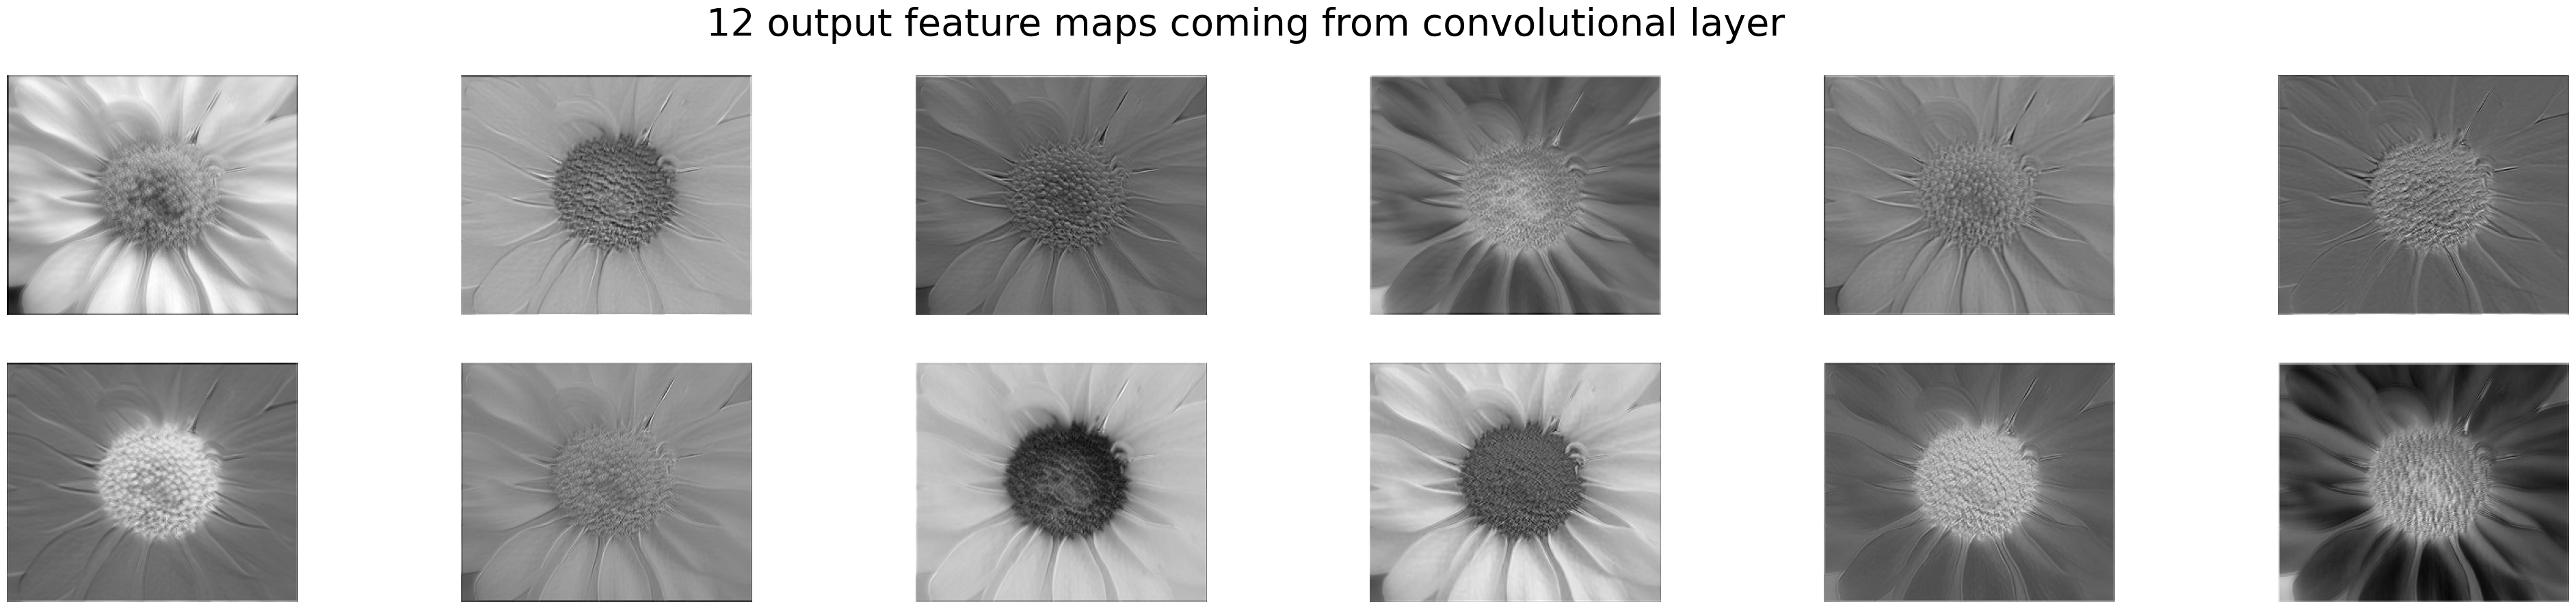

In [7]:
output = layer(img)

print(output.shape)
plot_title = "12 output feature maps coming from convolutional layer"

plt.figure(figsize=(50, 10))
for feature_map in output:
    layer_viz = output[0, :, :, :]
    layer_viz = layer_viz.data
for i, filter in enumerate(layer_viz):
    plt.subplot(2, 6, i + 1)
    plt.imshow(filter.detach().cpu().numpy(), cmap='gray')
    plt.axis("off")
    plt.suptitle(plot_title, fontsize=40)